## __Super Eagles 2024: How Well do you Know the Players?__



### 1. Introduction

This is a data-driven exploration of the Nigerian national football team, the Super Eagles, for the year __2024__. Leveraging Python's BeautifulSoup and requests libraries for web scraping, followed by Pandas and Mathplotlib for Exploratory Data Analysis(EDA) and Visualization respectively, this project offers a comprehensive dive into the players' attributes and statistics.


##### Contents
1. Introduction
2. Data Gathering
3. Data Cleaning and Preparation
4. Data Preprocessing
5. Exploratory Data Analysis (EDA)
6. Data Visualization
7. Conclusion  

### 2. Data Gathering

In [91]:
pip install bs4

In [1]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Import librabries
from bs4 import BeautifulSoup
import requests
import pandas as pd
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

C:\Users\ELITEX21012G2\AppData\Local\Temp\ipykernel_5100\1793020591.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [5]:
# Define the URL of the webpage to scrape
url = 'https://www.transfermarkt.com/nigeria/kader/verein/3444/saison_id/2023/plus/1'  # Replace this with the target website URL

# Define custom headers to mimic a request from a web browser
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/109.0.0.0 Safari/537.36',
}
 
# Send an HTTP GET request to the URL with the custom headers
response = requests.get(url, headers=headers)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    print(response.text)  # Print the content of the response
else:
    print(f'Request failed with status code: {response.status_code}')


<!DOCTYPE html>
<html lang="en">

<head>
    
<script type="text/javascript" data-description="sourcepoint stub code">
    !function () { var e = function () { var e, t = "__tcfapiLocator", a = [], n = window; for (; n;) { try { if (n.frames[t]) { e = n; break } } catch (e) { } if (n === window.top) break; n = n.parent } e || (!function e() { var a = n.document, r = !!n.frames[t]; if (!r) if (a.body) { var i = a.createElement("iframe"); i.style.cssText = "display:none", i.name = t, a.body.appendChild(i) } else setTimeout(e, 5); return !r }(), n.__tcfapi = function () { for (var e, t = arguments.length, n = new Array(t), r = 0; r < t; r++)n[r] = arguments[r]; if (!n.length) return a; if ("setGdprApplies" === n[0]) n.length > 3 && 2 === parseInt(n[1], 10) && "boolean" == typeof n[3] && (e = n[3], "function" == typeof n[2] && n[2]("set", !0)); else if ("ping" === n[0]) { var i = { gdprApplies: e, cmpLoaded: !1, cmpStatus: "stub" }; "function" == typeof n[2] && n[2](i) } else a.push(n) }, 

In [6]:
# Create a BeautifulSoup object from the HTML content of the response
soup = BeautifulSoup(response.text,'html')

# Find the location of the table to scrape
table = soup.find('table', class_ = 'items')

table

<table class="items">
<thead>
<tr>
<th class="zentriert" id="yw1_c0"><a class="sort-link asc" href="/nigeria/kader/verein/3444/saison_id/2023/plus/1/sort/trikotNumber.desc">#</a></th><th id="yw1_c1"><a class="sort-link" href="/nigeria/kader/verein/3444/saison_id/2023/plus/1/sort/name">Player</a></th><th class="zentriert" id="yw1_c2"><a class="sort-link" href="/nigeria/kader/verein/3444/saison_id/2023/plus/1/sort/dateOfBirthTimestamp">Date of birth/Age</a></th><th class="zentriert" id="yw1_c3">Club</th><th class="zentriert" id="yw1_c4"><a class="sort-link" href="/nigeria/kader/verein/3444/saison_id/2023/plus/1/sort/size.desc">Height</a></th><th class="zentriert" id="yw1_c5"><a class="sort-link" href="/nigeria/kader/verein/3444/saison_id/2023/plus/1/sort/foot.desc">Foot</a></th><th class="zentriert" id="yw1_c6"><a class="sort-link" href="/nigeria/kader/verein/3444/saison_id/2023/plus/1/sort/nationalTeamMatchCount.desc">International matches</a></th><th class="zentriert" id="yw1_c7"><a cl

In [7]:
# Extract the 'headers' from the 'th'
squad_titles = table.find_all('th')

squad_table_titles = [title.text.strip() for title in squad_titles]

# Add another header 'Position' after the 'Player'
squad_table_titles.insert(squad_table_titles.index('Player') + 1, 'Position')

print(squad_table_titles)

['#', 'Player', 'Position', 'Date of birth/Age', 'Club', 'Height', 'Foot', 'International matches', 'Goals', 'Debut', 'Market value']


In [23]:
# Place it into a DataFrame
df = pd.DataFrame(columns = squad_table_titles)

df

,#,Player,Position,Date of birth/Age,Club,Height,Foot,International matches,Goals,Debut,Market value


In [24]:
# Extract the rows out
column_data = table.find_all('tr')
for row in column_data:
    row_data = row.find_all('td')
    individual_row_data = [data.text.strip() for data in row_data]  
    print(individual_row_data)

[]
['1', 'Francis Uzoho            \n\n\n\n\n            Goalkeeper', '', 'Francis Uzoho', 'Goalkeeper', 'Oct 28, 1998 (25)', '', '1,96m', 'right', '29', '-', 'Nov 14, 2017', '€450k']
['', 'Francis Uzoho']
['Goalkeeper']
['23', 'Stanley Nwabili            \n\n\n\n\n            Goalkeeper', '', 'Stanley Nwabili', 'Goalkeeper', 'Jun 10, 1996 (27)', '', '1,96m', 'right', '9', '-', '-', '€250k']
['', 'Stanley Nwabili']
['Goalkeeper']
['16', 'Olorunleke Ojo            \n\n\n\n\n            Goalkeeper', '', 'Olorunleke Ojo', 'Goalkeeper', 'Aug 17, 1995 (28)', '', '1,90m', 'right', '-', '-', '-', '€100k']
['', 'Olorunleke Ojo']
['Goalkeeper']
['21', 'Calvin Bassey            \n\n\n\n\n            Centre-Back', '', 'Calvin Bassey', 'Centre-Back', 'Dec 31, 1999 (24)', '', '1,85m', 'left', '10', '-', 'Mar 25, 2022', '€16.00m']
['', 'Calvin Bassey']
['Centre-Back']
['20', 'Chidozie Awaziem            \n\n\n\n\n            Centre-Back', '', 'Chidozie Awaziem', 'Centre-Back', 'Jan 1, 1997 (27)', ''

### 3. Data Cleaning and Preparation

In [25]:
# Assuming individual_row_data is a list with the correct number of elements
expected_num_columns = len(df.columns)

for row in column_data[1:]:
    row_data = row.find_all('td')
    individual_row_data = [data.get_text(strip=True) for data in row_data]
    
    # Extract the club title from the <a> tag's 'title' attribute
    club_title = next((data.find('a')['title'] for data in row_data if data.find('a') and 'title' in data.find('a').attrs), None)
    
    # Replace the item at index   4 (fifth position) with the club title
    if club_title:
        individual_row_data[6] = club_title
    
    # Remove the second and third columns (indices   1 and   2 since list is zero-indexed)
    if len(individual_row_data) >   2:
        del individual_row_data[1]
        del individual_row_data[1]
    
    # Check if the row has the correct number of columns before appending
    if len(individual_row_data) == expected_num_columns:
        # Use .loc[] to assign the new row to the DataFrame
        df.loc[len(df)] = individual_row_data
df

,#,Player,Position,Date of birth/Age,Club,Height,Foot,International matches,Goals,Debut,Market value
0,1,Francis Uzoho,Goalkeeper,"Oct 28, 1998 (25)",Omonia Nicosia,"1,96m",right,29,-,"Nov 14, 2017",€450k
1,23,Stanley Nwabili,Goalkeeper,"Jun 10, 1996 (27)",Chippa United,"1,96m",right,9,-,-,€250k
2,16,Olorunleke Ojo,Goalkeeper,"Aug 17, 1995 (28)",Enyimba Aba,"1,90m",right,-,-,-,€100k
3,21,Calvin Bassey,Centre-Back,"Dec 31, 1999 (24)",Fulham FC,"1,85m",left,10,-,"Mar 25, 2022",€16.00m
4,20,Chidozie Awaziem,Centre-Back,"Jan 1, 1997 (27)",Boavista FC,"1,89m",right,29,1,"Jun 10, 2017",€3.00m
5,5,William Troost-Ekong,Centre-Back,"Sep 1, 1993 (30)",PAOK Thessaloniki,"1,91m",right,64,4,"Jun 13, 2015",€2.00m
6,22,Kenneth Omeruo,Centre-Back,"Oct 17, 1993 (30)",Kasimpasa,"1,85m",right,61,1,"Jan 9, 2013",€2.00m
7,6,Semi Ajayi,Centre-Back,"Nov 9, 1993 (30)",West Bromwich Albion,"1,93m",right,24,-,"Sep 8, 2018",€1.80m
8,3,Zaidu,Left-Back,"Jun 13, 1997 (26)",FC Porto,"1,82m",left,15,-,"Oct 9, 2020",€3.00m
9,13,Bruno Onyemaechi,Left-Back,"Apr 3, 1999 (24)",Boavista FC,"1,84m",left,1,-,"Sep 10, 2023",€3.00m


In [26]:
# Replace "-" with 0 in the "International matches" and "Goals" columns
df['International matches'] = df['International matches'].replace('-', 0)
df['Goals'] = df['Goals'].replace('-', 0)

# Replace 'm' with ' ' and ',' with '.' in "Height" column 
df['Height'] = df['Height'].str.replace('m', '', regex=True)
df['Height'] = df['Height'].str.replace(',', '.', regex=True)

In [27]:
# Rename the column 'Market value' to 'Market value(EURO €)
df.rename(columns={'Market value': 'Market value(EURO €)'}, inplace=True)

# Rename the column 'Market value' to 'Market value(EURO €)
df.rename(columns={'Height': 'Height(m)'}, inplace= True)


In [28]:
# Update Data with current values
df.loc[3:11, 'Position'] = 'Defender'
df.loc[12:17, 'Position'] = 'Midfield'
df.loc[18:24, 'Position'] = 'Forward'
df.at[8,'Player'] = 'Zaidu Sanusi'
df.at[1,'Player'] = 'Stanley Nwabali'
df.at[0,'International matches'] = 35
df.at[1,'International matches'] = 9
df.at[8,'International matches'] = 22
df.at[11,'International matches'] = 40
df.at[5,'International matches'] = 71
df.at[7,'International matches'] = 34
df.at[10,'International matches'] = 14
df.at[9,'International matches'] = 5
df.at[4,'International matches'] = 31
df.at[3,'International matches'] = 23
df.at[6,'International matches'] = 67
df.at[15,'International matches'] = 5
df.at[13,'International matches'] = 24
df.at[14,'International matches'] = 34
df.at[17,'International matches'] = 71
df.at[16,'International matches'] = 76
df.at[12,'International matches'] = 5
df.at[18,'International matches'] = 109
df.at[21,'International matches'] = 35
df.at[19,'International matches'] = 36
df.at[23,'International matches'] = 52
df.at[20,'International matches'] = 19
df.at[24,'International matches'] = 23
df.at[22,'International matches'] = 16
df.at[5,'Goals'] = 7
df.at[7,'Goals'] = 1
df.at[13,'Goals'] = 1
df.at[17,'Goals'] = 9
df.at[21,'Goals'] = 21
df.at[19,'Goals'] = 5
df.at[23,'Goals'] = 15
df.at[20,'Goals'] = 5
df.at[1, 'Debut'] = 'July 4, 2021'


#### 4. Data Preprocessing

In [29]:
# Convert the "Debut" column to datetime format
df['Debut'] = pd.to_datetime(df['Debut'], errors='coerce')

# Calculate the difference between present date and debut date
present_date = datetime(2024, 2, 1)  # February 2024
df['Years Played'] = (present_date - df['Debut']).dt.days / 365

# Round the 'Years Played' column to 1 decimal place
df['Years Played'] = df['Years Played'].round(1)


In [30]:
# Splitting the "Date of birth/Age" column into two separate columns
df[['Date of birth', 'Age']] = df['Date of birth/Age'].str.extract(r'(.+)\((\d+)\)')

# Dropping the original "Date of birth/Age" column
df.drop(columns=['Date of birth/Age'], inplace=True)

# Inserting the "Date of birth" column at position 3 and "Age" column at position 4
df.insert(3, 'Date of birth', df.pop('Date of birth'))
df.insert(4, 'Age', df.pop('Age'))


In [31]:
df

,#,Player,Position,Date of birth,Age,Club,Height(m),Foot,International matches,Goals,Debut,Market value(EURO €),Years Played
0,1,Francis Uzoho,Goalkeeper,"Oct 28, 1998",25,Omonia Nicosia,1.96,right,35,0,2017-11-14,€450k,6.2
1,23,Stanley Nwabali,Goalkeeper,"Jun 10, 1996",27,Chippa United,1.96,right,9,0,NaT,€250k,NaN
2,16,Olorunleke Ojo,Goalkeeper,"Aug 17, 1995",28,Enyimba Aba,1.90,right,0,0,NaT,€100k,NaN
3,21,Calvin Bassey,Defender,"Dec 31, 1999",24,Fulham FC,1.85,left,23,0,2022-03-25,€16.00m,1.9
4,20,Chidozie Awaziem,Defender,"Jan 1, 1997",27,Boavista FC,1.89,right,31,1,2017-06-10,€3.00m,6.6
5,5,William Troost-Ekong,Defender,"Sep 1, 1993",30,PAOK Thessaloniki,1.91,right,71,7,2015-06-13,€2.00m,8.6
6,22,Kenneth Omeruo,Defender,"Oct 17, 1993",30,Kasimpasa,1.85,right,67,1,2013-01-09,€2.00m,11.1
7,6,Semi Ajayi,Defender,"Nov 9, 1993",30,West Bromwich Albion,1.93,right,34,1,2018-09-08,€1.80m,5.4
8,3,Zaidu Sanusi,Defender,"Jun 13, 1997",26,FC Porto,1.82,left,22,0,2020-10-09,€3.00m,3.3
9,13,Bruno Onyemaechi,Defender,"Apr 3, 1999",24,Boavista FC,1.84,left,5,0,2023-09-10,€3.00m,0.4


In [32]:
# Remove the Euro symbol from the 'Market' column
df['Market value(EURO €)'] = df['Market value(EURO €)'].str.replace('€', '', regex=True)

def convert_decimal_string_to_thousands(decimal_str):
    # Check if 'm' is in the string
    if 'm' in decimal_str:
        # Remove the 'm' and parse the remaining string to a float
        decimal_value = float(decimal_str.rstrip('m'))
        # Convert the float to an integer to remove the decimal point
        integer_value = int(decimal_value *   100)
        # Multiply by   1000 to convert to thousands
        thousands_value = integer_value *   10000
        return thousands_value
    else:
        # Handle the case where 'm' is not found in the string
        # Parse the string to a float
        decimal_value = float(decimal_str.rstrip('k'))
        # Multiply by  1000 to convert to thousands
        return int(decimal_value *  1000)

# Example usage:
df['Market value(EURO €)'] = df['Market value(EURO €)'].apply(convert_decimal_string_to_thousands)



In [33]:

# Convert  specific column to a different data type
df['Player'] = df['Player'].astype(str)
df['Position'] = df['Position'].astype(str)
df['Club'] = df['Club'].astype(str)
df['Height(m)'] = df['Height(m)'].astype(float)
df['Foot'] = df['Foot'].astype(str)
df['Age'] = df['Age'].astype(int)
df['Goals'] = df['Goals'].astype(int)

# Convert 'Date of Birth' column to date datatype
df['Date of birth'] = pd.to_datetime(df['Date of birth'])


In [34]:
df

,#,Player,Position,Date of birth,Age,Club,Height(m),Foot,International matches,Goals,Debut,Market value(EURO €),Years Played
0,1,Francis Uzoho,Goalkeeper,1998-10-28,25,Omonia Nicosia,1.96,right,35,0,2017-11-14,450000,6.2
1,23,Stanley Nwabali,Goalkeeper,1996-06-10,27,Chippa United,1.96,right,9,0,NaT,250000,NaN
2,16,Olorunleke Ojo,Goalkeeper,1995-08-17,28,Enyimba Aba,1.90,right,0,0,NaT,100000,NaN
3,21,Calvin Bassey,Defender,1999-12-31,24,Fulham FC,1.85,left,23,0,2022-03-25,16000000,1.9
4,20,Chidozie Awaziem,Defender,1997-01-01,27,Boavista FC,1.89,right,31,1,2017-06-10,3000000,6.6
5,5,William Troost-Ekong,Defender,1993-09-01,30,PAOK Thessaloniki,1.91,right,71,7,2015-06-13,2000000,8.6
6,22,Kenneth Omeruo,Defender,1993-10-17,30,Kasimpasa,1.85,right,67,1,2013-01-09,2000000,11.1
7,6,Semi Ajayi,Defender,1993-11-09,30,West Bromwich Albion,1.93,right,34,1,2018-09-08,1800000,5.4
8,3,Zaidu Sanusi,Defender,1997-06-13,26,FC Porto,1.82,left,22,0,2020-10-09,3000000,3.3
9,13,Bruno Onyemaechi,Defender,1999-04-03,24,Boavista FC,1.84,left,5,0,2023-09-10,3000000,0.4


#### 5. Exploratory Data Analysis (EDA)

In [36]:
# getting the overview of my DataFrame's structure
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, 0 to 24
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   #                      25 non-null     object        
 1   Player                 25 non-null     object        
 2   Position               25 non-null     object        
 3   Date of birth          25 non-null     datetime64[ns]
 4   Age                    25 non-null     int32         
 5   Club                   25 non-null     object        
 6   Height(m)              25 non-null     float64       
 7   Foot                   25 non-null     object        
 8   International matches  25 non-null     object        
 9   Goals                  25 non-null     int32         
 10  Debut                  23 non-null     datetime64[ns]
 11  Market value(EURO €)   25 non-null     int64         
 12  Years Played           23 non-null     float64       
dtypes: datetime6

In [37]:
# Obtaining df summary statistics for numerical columns, providing insights into the distribution of the data.
df.describe()

#df.select_dtypes(include= 'number')

,Date of birth,Age,Height(m),Goals,Debut,Market value(EURO €),Years Played
count,25,25.000000,25.000000,25.00000,23,2.500000e+01,23.000000
mean,1997-02-19 17:16:48,26.520000,1.840400,4.04000,2018-11-10 06:15:39.130434816,1.328000e+07,5.226087
min,1992-10-14 00:00:00,22.000000,1.680000,0.00000,2010-09-05 00:00:00,1.000000e+05,0.100000
25%,1995-08-17 00:00:00,25.000000,1.820000,0.00000,2016-08-26 12:00:00,2.000000e+06,2.300000
50%,1997-01-01 00:00:00,27.000000,1.840000,1.00000,2018-11-20 00:00:00,8.000000e+06,5.200000
75%,1998-12-29 00:00:00,28.000000,1.890000,5.00000,2021-10-29 00:00:00,1.600000e+07,7.400000
max,2001-04-19 00:00:00,31.000000,2.010000,21.00000,2024-01-08 00:00:00,1.100000e+08,13.400000
std,NaN,2.347339,0.083391,5.86998,NaN,2.207149e+07,3.492227


In [38]:
# identifying columns with missing data
df.isnull().sum()

#                        0
Player                   0
Position                 0
Date of birth            0
Age                      0
Club                     0
Height(m)                0
Foot                     0
International matches    0
Goals                    0
Debut                    2
Market value(EURO €)     0
Years Played             2
dtype: int64

In [39]:
# identifying columns with unique value
df.nunique()

#                        24
Player                   25
Position                  4
Date of birth            25
Age                      10
Club                     23
Height(m)                18
Foot                      2
International matches    19
Goals                    12
Debut                    20
Market value(EURO €)     20
Years Played             20
dtype: int64

In [40]:
df.sort_values(by = "Goals", ascending= False).head(5)

,#,Player,Position,Date of birth,Age,Club,Height(m),Foot,International matches,Goals,Debut,Market value(EURO €),Years Played
21,9,Victor Osimhen,Forward,1998-12-29,25,SSC Napoli,1.86,right,35,21,2017-06-10,110000000,6.6
18,7,Ahmed Musa,Forward,1992-10-14,31,Sivasspor,1.71,right,109,16,2010-09-05,900000,13.4
23,14,Kelechi Iheanacho,Forward,1996-10-03,27,Leicester City,1.85,left,52,15,2015-11-13,16000000,8.2
16,17,Alex Iwobi,Midfield,1996-05-03,27,Fulham FC,1.83,right,76,10,2015-10-08,28000000,8.3
17,15,Moses Simon,Midfield,1995-07-12,28,FC Nantes,1.68,right,71,9,2015-03-25,10000000,8.9


In [41]:
# Sort the DataFrame based on 'Goals' column in descending order and select the top 5 rows
top_5_goals = df.sort_values(by='Goals', ascending=False).head(5)

top_goals= top_5_goals[['Player', 'Goals']].reset_index(drop = True)

top_goals

,Player,Goals
0,Victor Osimhen,21
1,Ahmed Musa,16
2,Kelechi Iheanacho,15
3,Alex Iwobi,10
4,Moses Simon,9


In [42]:
# Sort the DataFrame based on 'Intenational matches' column in descending order and select the top 5 rows
appearance = df.sort_values(by='International matches', ascending=False).head(5)

caps = appearance[['Player', 'International matches']]

caps

,Player,International matches
18,Ahmed Musa,109
16,Alex Iwobi,76
5,William Troost-Ekong,71
17,Moses Simon,71
6,Kenneth Omeruo,67


In [43]:
# Sort the DataFrame based on 'Intenational matches' column in descending order and select the top 5 rows
high_value = df.sort_values(by='Market value(EURO €)', ascending=False).head(5)

value = high_value[['Player', 'Market value(EURO €)']]

value

,Player,Market value(EURO €)
21,Victor Osimhen,110000000
20,Ademola Lookman,30000000
16,Alex Iwobi,28000000
22,Terem Moffi,25000000
19,Samuel Chukwueze,23000000


In [44]:
select_columns = ['Age', 'International matches', 'Height(m)', 'Goals', 'Market value(EURO €)', 'Years Played']

correlation_matrix = df[select_columns].corr()

correlation_matrix

,Age,International matches,Height(m),Goals,Market value(EURO €),Years Played
Age,1.000000,0.644665,0.175568,0.240344,-0.254089,0.765313
International matches,0.644665,1.000000,-0.263164,0.615179,0.011847,0.943554
Height(m),0.175568,-0.263164,1.000000,-0.247735,-0.070694,0.001658
Goals,0.240344,0.615179,-0.247735,1.000000,0.655723,0.580843
Market value(EURO €),-0.254089,0.011847,-0.070694,0.655723,1.000000,0.003465
Years Played,0.765313,0.943554,0.001658,0.580843,0.003465,1.000000


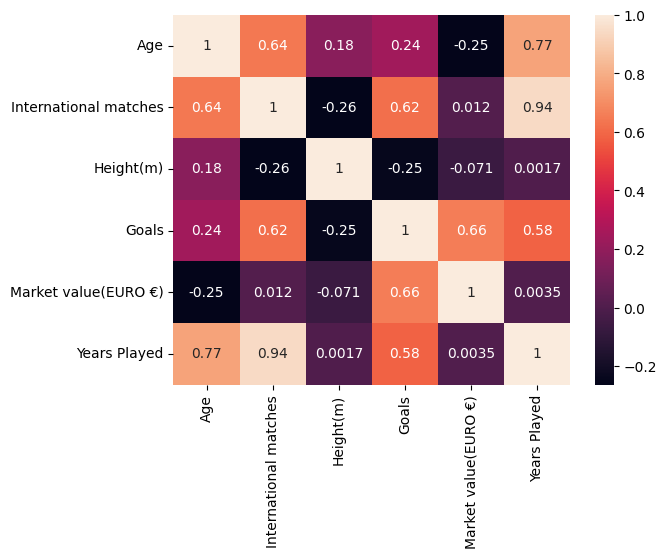

In [45]:
sns.heatmap(df[select_columns].corr(), annot= True)

#to change the size of the plt
#plt.rcParams['figure.figsize' = (15,7)]

plt.show()

<Axes: >

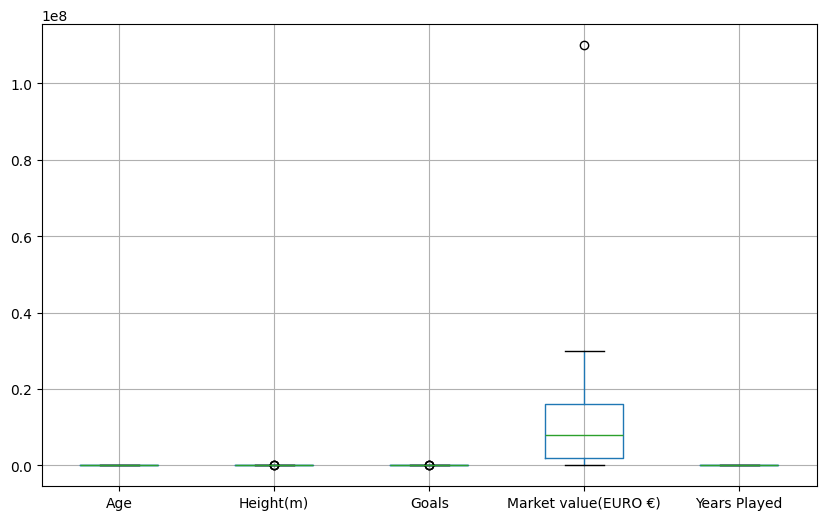

In [53]:
df[select_columns].boxplot(figsize=(10,6))

In [52]:

result = df.groupby('Position').agg({'Age': 'mean', 'Height(m)': 'mean', 'International matches': 'mean', 'Market value(EURO €)': 'sum'}).sort_values(by = 'Market value(EURO €)')

result = result.round(1)

result['International matches'] = result['International matches'].apply(lambda x: round(x, 1))

result

,Age,Height(m),International matches,Market value(EURO €)
Position,,,,
Goalkeeper,26.7,1.9,14.7,800000
Defender,27.1,1.9,34.1,47300000
Midfield,25.5,1.8,35.8,66000000
Forward,26.6,1.8,41.4,217900000


### 4. Data Visualization


<Axes: title={'center': ' Top 5 Super Eagles Goals Scorers'}, xlabel='Goals', ylabel='Player'>

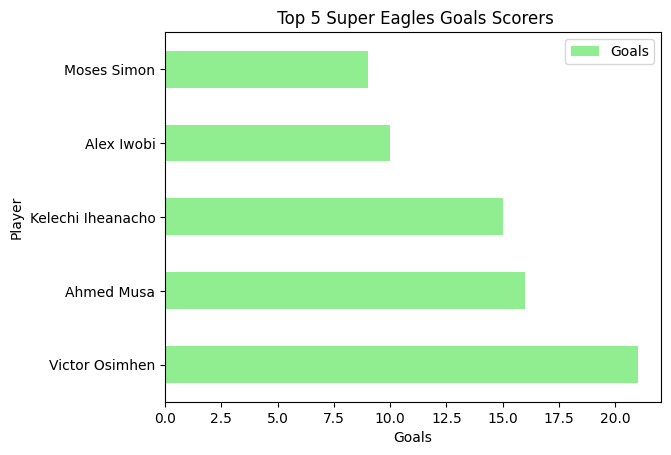

In [251]:
top_goals.plot.barh('Player', 'Goals', ylabel = 'Player', xlabel = 'Goals', color= 'lightgreen', title = ' Top 5 Super Eagles Goals Scorers')

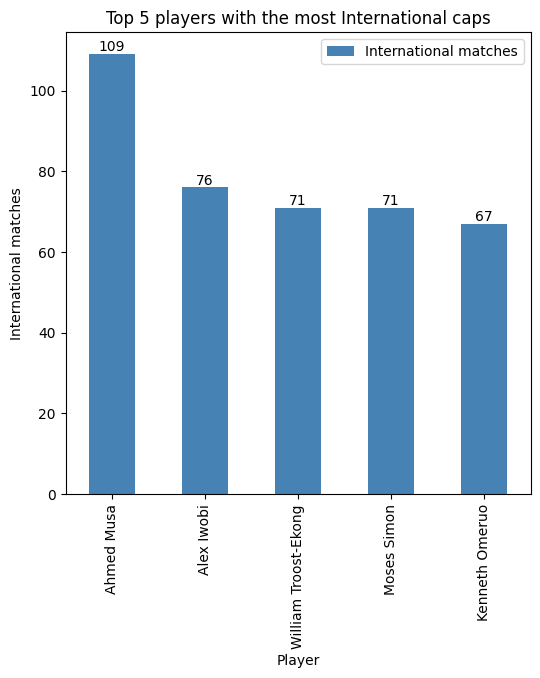

In [56]:

ax = caps.plot(kind='bar', figsize=(6,  6), color='steelblue')
plt.ylabel('International matches')
plt.xlabel('Player')   
plt.title('Top 5 players with the most International caps')

# Set player names as x-tick labels
plt.xticks(range(len(caps)), caps['Player'])

# Annotate value labels to each bar
for i in range(len(caps)):
    matches = caps['International matches'].iloc[i]
    label = f'{matches}'
    ax.annotate(label, xy=(i, matches), color='black', ha='center', va='bottom')

plt.show()


In [77]:

value

,Player,Market value(EURO €)
21,Victor Osimhen,110000000
20,Ademola Lookman,30000000
16,Alex Iwobi,28000000
22,Terem Moffi,25000000
19,Samuel Chukwueze,23000000


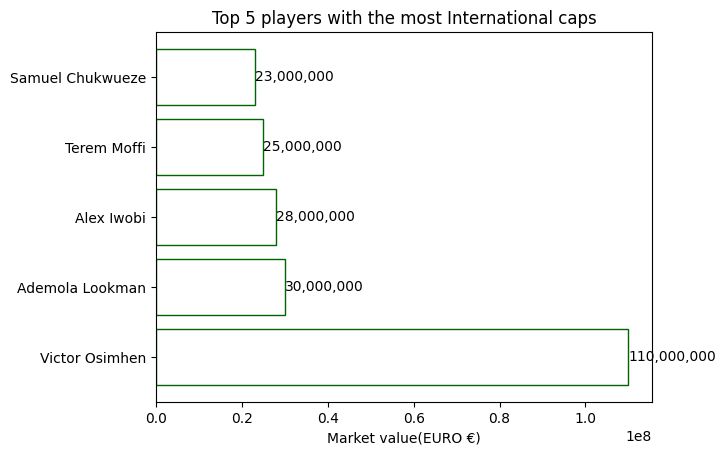

In [59]:
# Create a horizontal bar chart
lb = plt.barh(value['Player'], value['Market value(EURO €)'], align='center', color='None', edgecolor='darkgreen', alpha=1)
plt.yticks(value['Player'])   # Use player names for yticks
plt.xlabel('Market value(EURO €)')   # Label for x-axis
plt.title('Top 5 players with the most International caps')

# Annotate value labels to each bar
for bar in lb:
    market = bar.get_width()  # Get the market value from the width of the bar
    label = f'{market:,.0f}'  # Format the label
    plt.annotate(label, xy=(market, bar.get_y() + bar.get_height() / 2), color='black', ha='left', va='center')

plt.show()

<Axes: title={'center': 'Relationship between Players CAPS and Years Played'}, xlabel='International matches', ylabel='Years Played'>

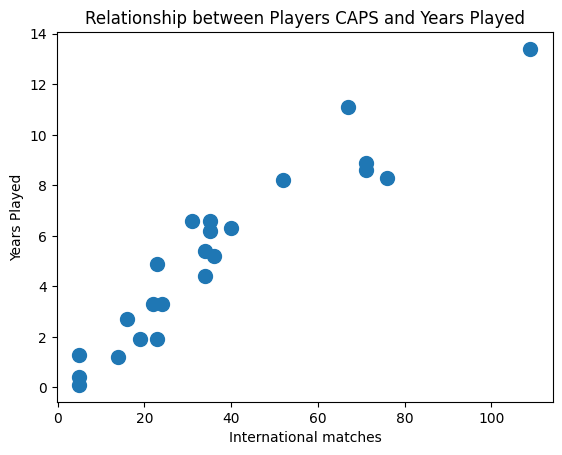

In [60]:
df.plot.scatter(x = 'International matches', y = 'Years Played', s= 100, title = 'Relationship between Players CAPS and Years Played')

<Axes: title={'center': 'Relationship between Players CAPS and Market value(EURO €)'}, xlabel='International matches', ylabel='Market value(EURO €)'>

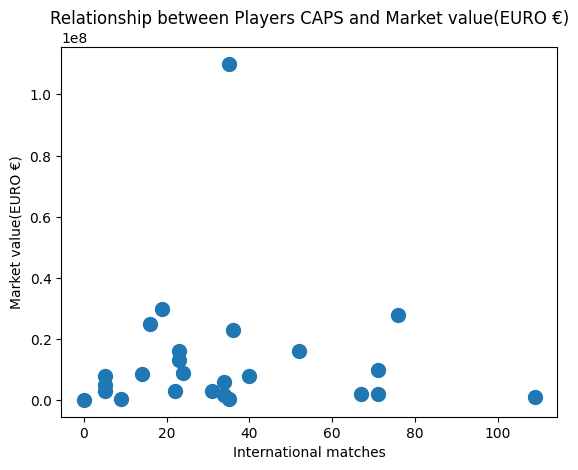

In [63]:
df.plot.scatter(x = 'International matches', y = 'Market value(EURO €)', s = 100, title = 'Relationship between Players CAPS and Market value(EURO €)')

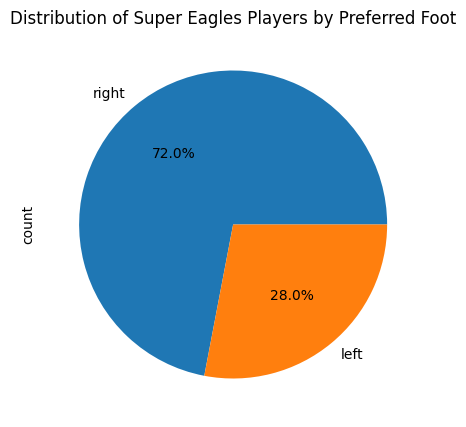

In [269]:
# Count the occurrences of each category in the 'Foot' column
foot_counts = df['Foot'].value_counts()

# Plot a pie chart
foot_counts.plot.pie(autopct='%1.1f%%', figsize=(5, 5))

# Add a title
plt.title('Distribution of Super Eagles Players by Preferred Foot')

# Show the plot
plt.show()

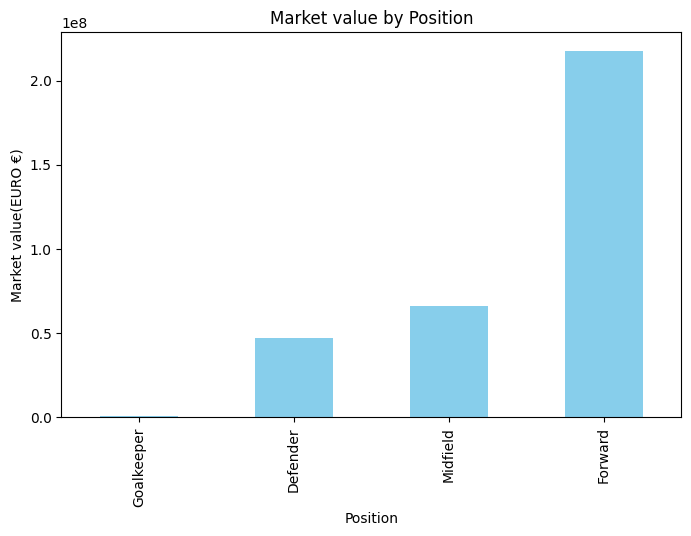

In [65]:
# Create DataFrame
results = pd.DataFrame(result, index=['Goalkeeper', 'Defender', 'Midfield', 'Forward'])
# Plot the bar chart
results['Market value(EURO €)'].plot(kind='bar', color='skyblue', figsize=(8, 5))

# Add labels and title
plt.xlabel('Position')
plt.ylabel('Market value(EURO €)')
plt.title('Market value by Position')

# Show the plot
plt.show()

In [ ]:
df.to_csv(r'C:\Users\ELITEX21012G2\Documents\SUperEagles\players_.csv', index=False)

#### 8. Conclusion


I exported this file to Tableau where i built a dashboard with it to better display my analysis.

In [22]:
#df = df.iloc[0:0]
df = pd.DataFrame()  # Reassign an empty DataFrame

len(df)

0